## Setup

Para começar, importa as bibliotecas necessárias, em especial a `helper`, que contém função, contantes, etc, que foram criadas para organizar melhor o notebook. No final, configura `matplotlib` para carregar os gráficos no próprio notebook e executa configuração globais do `plt`, ponto de partida para criar os gráficos.

In [7]:
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import helper

%matplotlib inline
plt.rcdefaults()
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn-whitegrid')

## Requisitando os dados no Transifex

In [2]:
# Request all resources available on Transifex
resources = helper.transifex_api("resources/")
resources = [resource["slug"] for resource in resources]

In [3]:
# Retrieve statistics from every resource
# TODO: We'd benefit from asyncio here. It's a bit slow and
# be able to run concurrent request would help make it faster.
stats = defaultdict(lambda: {"translated_words": 0, "words": 0})
for resource in resources:
    stat = helper.transifex_api(f"resource/{resource}/stats/pt_BR/")
    
    # Group stats considering the first part of slug.
    # Transform "c-api--abstract" and "c-api--allocation" into "c-api".
    resource = resource.split('--')[0]
    
    stats[resource]["translated_words"] += stat["translated_words"]
    stats[resource]["words"] += stat["translated_words"] + stat["untranslated_words"]
    
stats = {key: stats[key] for key in sorted(stats.keys(), reverse=True)}

*Essa parte é maquiagem pura, apenas para colorir o gráfico com as cores azul e amarelo.*

In [4]:
# Configure nice colors for the chart.
# The palette function is not clear and I'm sure there is a better way to do it.
fill_palette, line_palette = helper.palette(stats.keys())

## O quanto já foi traduzido?

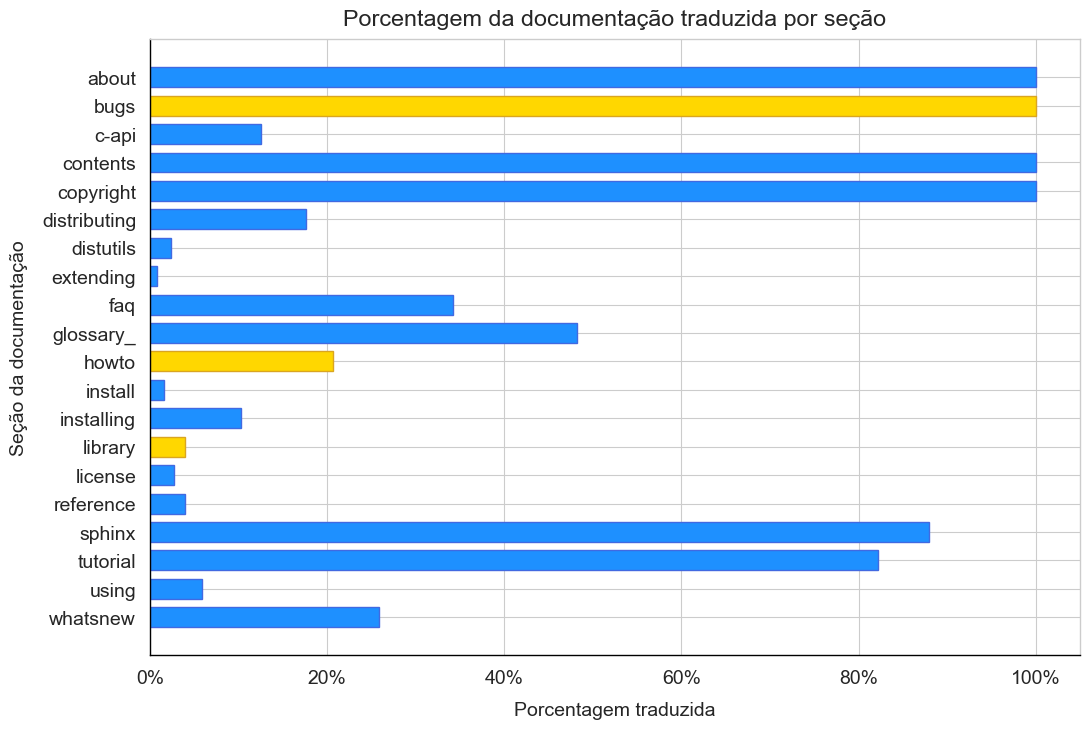

In [8]:
y_resources = list(stats.keys())
x_translated = [s['translated_words']/s['words'] for s in stats.values()]

figure, ax = plt.subplots(figsize=(12,8))

helper.setup_axes(ax)
ax.set_title("Porcentagem da documentação traduzida por seção", pad=10)
ax.set_xlabel("Porcentagem traduzida", labelpad=10)
ax.set_ylabel("Seção da documentação", labelpad=10)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.barh(y_resources, x_translated, height=0.7, color=fill_palette, edgecolor=line_palette)

plt.close()
figure

## Quanto falta traduzir em cada seção?

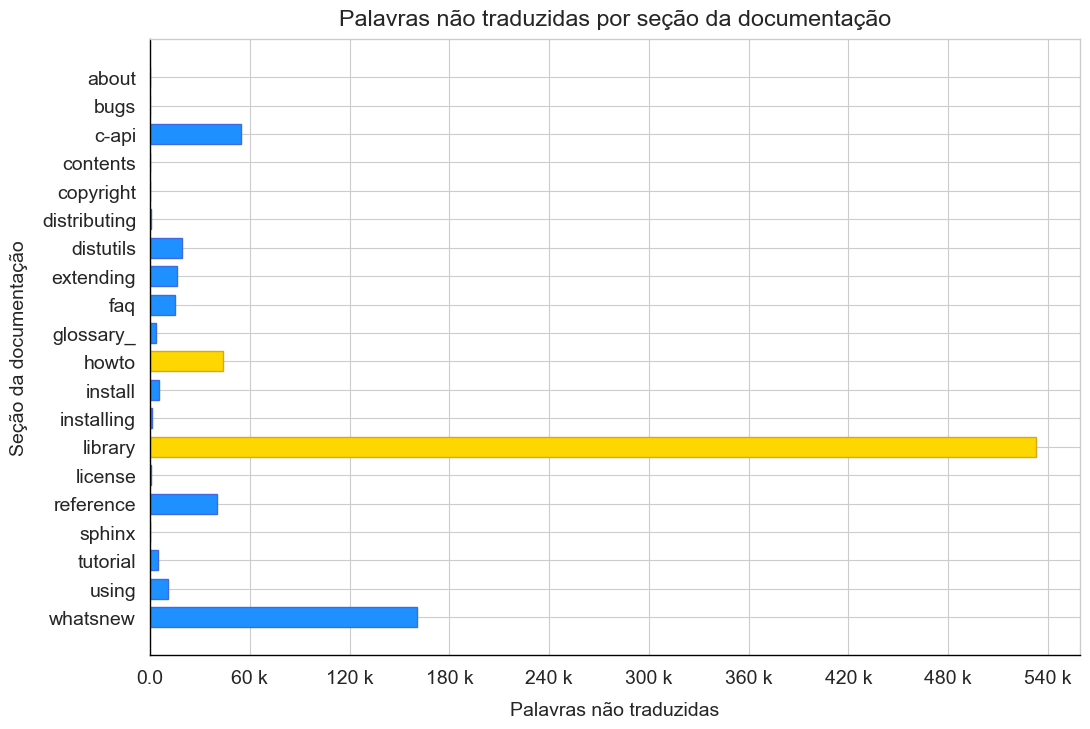

In [9]:
y_resources = list(stats.keys())
x_words = [s['words']-s['translated_words'] for s in stats.values()]

figure, ax = plt.subplots(figsize=(12,8))
helper.setup_axes(ax)

ax.set_title("Palavras não traduzidas por seção da documentação", pad=10)
ax.set_xlabel("Palavras não traduzidas", labelpad=10)
ax.set_ylabel("Seção da documentação", labelpad=10)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(helper.kilo_format))
ax.barh(y_resources, x_words, height=0.7, color=fill_palette, edgecolor=line_palette)

plt.close()
figure